# Lending Club Case Study Notebook

## In the first part of the code, I read the data and trying to find data quality issues 
## Such as Outliers, Missing values and other data quality issues.


### Loading Libraries and Data

In [74]:
#importing Libraries for data manipulation
import pandas as pd #dataframe
import numpy as np #numerical python
#importing Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

In [118]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
loan_data = pd.read_csv('loan.csv')
loan_dict = pd.read_excel('Data_Dictionary.xlsx')

### Printing the first 5 rows of the dataframe and data dictionary

In [119]:
# Printing the data dictionary(first 5 rows)
loan_dict.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [120]:
# Printing the data(first 5 rows)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

### Find Metadata from the data given

In [121]:
metaDict={}
metaDict["NumberOfColumns"]=loan_data.shape[1]
metaDict["NumberOfRows"]=loan_data.shape[0]
metaDict["NumberOfMissingValues"]=loan_data.isnull().sum().sum()
metaDict["NumberOfUniqueValues"]=loan_data.nunique().sum()
metaDict["NumberOfDuplicates"]=loan_data.duplicated().sum()

In [84]:
metaDict

{'NumberOfColumns': 111,
 'NumberOfRows': 39717,
 'NumberOfMissingValues': 2263364,
 'NumberOfUniqueValues': 416801,
 'NumberOfDuplicates': 0}

### Essential details such as the index data type, column data types, non-null values, and memory usage.

In [122]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


### DataType of All columns

In [123]:
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


### Basic statistical details like percentile, mean, std, etc

In [124]:
pd.options.display.float_format = '{:.2f}'.format
print(loan_data.describe())

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00           

### Calculate Null values in columns and rows

In [125]:
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


## Percentage of Null or Missing Values

In [126]:
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


## Removing columns which has more than 50% null values

In [127]:
loan_data=loan_data.drop(null_perc[ null_perc > 50 ].index, axis=1)

## ReCheck the Null values Column percentage

In [128]:
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

null_perc[ null_perc > 0 ]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

### Missing values across the rows 

In [131]:
print((loan_data.isnull().sum(axis=1)).max())

6


### It shows clearly that the missing values rows are very low in count. Now we can move ahead because the its impact is minimal.

## Finding number of unique values in each column

In [135]:
loan_data.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

### *'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status', 'collections_12_mths_ex_med', 'pymnt_plan'* columns have only one unique value in all the rows, which will not give any usefull info for us. so, removing these columns.

## Dropping Columns with only one values.

In [137]:
loan_data=loan_data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1)

## Rechecking the Unique value Count

In [139]:
print(loan_data.nunique().sort_values(ascending=True))

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

### Existing Columns

In [141]:
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [144]:
loan_data.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
dtype: int64

emp_title, and title columns have text values which are more unique values.

In [145]:
loan_data.drop(['emp_title', 'title'], axis=1, inplace=True)

In [146]:
loan_data.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
desc               26527
revol_bal          21711
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
dtype: int64

### Removing and fixing the null values

In [147]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

desc                       12940
emp_length                  1075
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
last_credit_pull_d             2
out_prncp_inv                  0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
out_prncp                      0
total_pymnt_inv                0
total_pymnt                    0
earliest_cr_line               0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
inq_last_6mths                 0
id                             0
delinq_2yrs                    0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installmen

In [148]:
#Finding percentage of null or missing values
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
desc                   32.58
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

### As desc column has 32 percent null values so droping this column

In [149]:
loan_data.drop(['desc'], axis=1, inplace=True)

### Re-Checking the Null  percentage

In [151]:
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.71
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

### emp_length  and   pub_rec_bankruptcies  columns null values need to address like fill or remove       

In [150]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_data.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [22]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


## The column 'emp_length', If we fix the null values it will impact the business information so we are removing it.

In [152]:
loan_data = loan_data.dropna(subset=['emp_length'])
print(loan_data.shape)

(38642, 42)


###  The column 'revol_util', 'last_pymnt_d', will have no impact on the analysis, if deleted
###  The column pub_rec_bankruptcies the data mostly has value 0 which can be subsitued in place of null as that

In [ ]:
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [161]:
loan_data.dropna(subset=['revol_util', 'last_pymnt_d'], inplace=True)

In [162]:
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_perc[ null_perc > 0 ]

last_credit_pull_d   0.01
dtype: float64

In [163]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum())

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

We are done with fixing and removing null values to improve the accuracy of the analysis.

In [164]:
# Shape of the dataframe
print(loan_data.shape)

(38533, 42)


### Removing duplicate rows from the dataframe

In [165]:
loan_data = loan_data.drop_duplicates()
print(loan_data.shape)


(38533, 42)


### Correcting Data Types and Deriving New Columns

In [166]:
# Checking information about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38533 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38533 non-null  int64  
 1   member_id                38533 non-null  int64  
 2   loan_amnt                38533 non-null  int64  
 3   funded_amnt              38533 non-null  int64  
 4   funded_amnt_inv          38533 non-null  float64
 5   term                     38533 non-null  object 
 6   int_rate                 38533 non-null  object 
 7   installment              38533 non-null  float64
 8   grade                    38533 non-null  object 
 9   sub_grade                38533 non-null  object 
 10  emp_length               38533 non-null  object 
 11  home_ownership           38533 non-null  object 
 12  annual_inc               38533 non-null  float64
 13  verification_status      38533 non-null  object 
 14  issue_d               

## Rectifying data type and format for columns
## Derving more columns 

In [167]:
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month


In [209]:
# loan_data.loan_status=loan_data.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [168]:
# Setting decimal point limit for all data 
for x in loan_data.columns:
    if(loan_data[x].dtype=='float64'):
      loan_data[x]=loan_data[x].round(2)
      
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000          4975.00    36   
1  1077430    1314167       2500         2500          2500.00    60   
2  1077175    1313524       2400         2400          2400.00    36   
3  1076863    1277178      10000        10000         10000.00    36   
4  1075358    1311748       3000         3000          3000.00    60   

   int_rate  installment grade sub_grade  emp_length home_ownership  \
0     10.65       162.87     B        B2       10.00           RENT   
1     15.27        59.83     C        C4        0.50           RENT   
2     15.96        84.33     C        C5       10.00           RENT   
3     13.49       339.31     C        C1       10.00           RENT   
4     12.69        67.79     B        B5        1.00           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0    24000.00            Verified 2011-12-01   Fully Paid   
1    30000.00     Source Verified 2011-12-01  Charged Off   
2    12252.00        Not Verified 2011-12-01   Fully Paid   
3    49200.00     Source Verified 2011-12-01   Fully Paid   
4    80000.00     Source Verified 2011-12-01      Current   

                                                 url         purpose zip_code  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card    860xx   
1  https://lendingclub.com/browse/loanDetail.acti...             car    309xx   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business    606xx   
3  https://lendingclub.com/browse/loanDetail.acti...           other    917xx   
4  https://lendingclub.com/browse/loanDetail.acti...           other    972xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0           Jan-85               1         3   
1         GA  1.00            0           Apr-99               5         3   
2         IL  8.72            0           Nov-01               2         2   
3         CA 20.00            0           Feb-96               1        10   
4         OR 17.94            0           Jan-96               0        15   

   pub_rec  revol_bal revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0      13648     83.70%          9       0.00           0.00   
1        0       1687      9.40%          4       0.00           0.00   
2        0       2956     98.50%         10       0.00           0.00   
3        0       5598        21%         37       0.00           0.00   
4        0      27783     53.90%         38     524.06         524.06   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      5863.16          5833.84          5000.00         863.16   
1      1008.71          1008.71           456.46         435.17   
2      3005.67          3005.67          2400.00         605.67   
3     12231.89         12231.89         10000.00        2214.92   
4      3513.33          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  issue_year  \
0           171.62             May-16                  0.00        2011   
1           119.66             Sep-13                  0.00        2011   
2           649.91             May-16                  0.00        2011   
3           357.48             Apr-16                  0.00        2011   
4            67.79             May-16                  0.00        2011   

   issue_month  
0           12  
1           12  
2           12  
3           1

As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [169]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_data.shape)

(37435, 44)


As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.

In [170]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_data.shape

(37435, 17)

In [171]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

### Removing the outliers

In [172]:
## starting with loan_amnt
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

In [174]:
## starting with int_rate
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

In [176]:
## starting with annual_inc
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'}).show()
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

In [177]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [178]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

In [40]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As the trend is more compatible with the analysis, we can proceed with analysis of column 'dti'.

In [179]:
## starting with dti
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
## There are no outliers in dti hence we can move ahead with analysis.

The data has been cleaned and outliers removed, we can move ahead with the analysis.

### Univariate Analysis

Fully Paid    85.75
Charged Off   14.25
Name: loan_status, dtype: float64


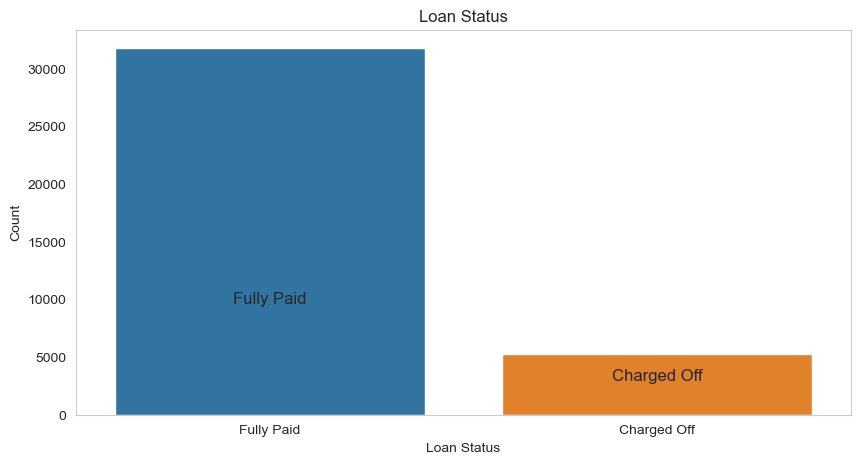

In [181]:
# Loan status 
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

**Inference:** Defaulted loan are low in numbers compared to Fully Paid.

In [182]:
# Loan Amount
print(loan_data.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

count   37065.00
mean    11046.03
std      7270.52
min       500.00
25%      5500.00
50%      9800.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


**Inference**: The loan amount varies from 500 to 35000 with a mean of 9800.

36   75.35
60   24.65
Name: term, dtype: float64


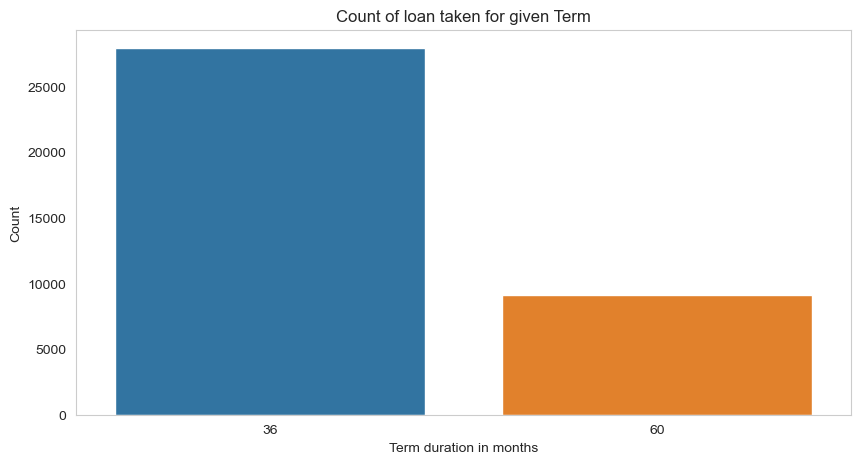

In [183]:
# Term of loan 
print(loan_data.term.value_counts()*100/loan_data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

**Inference**: More than half of the loan taken has term of 36 months compared to 60 months.

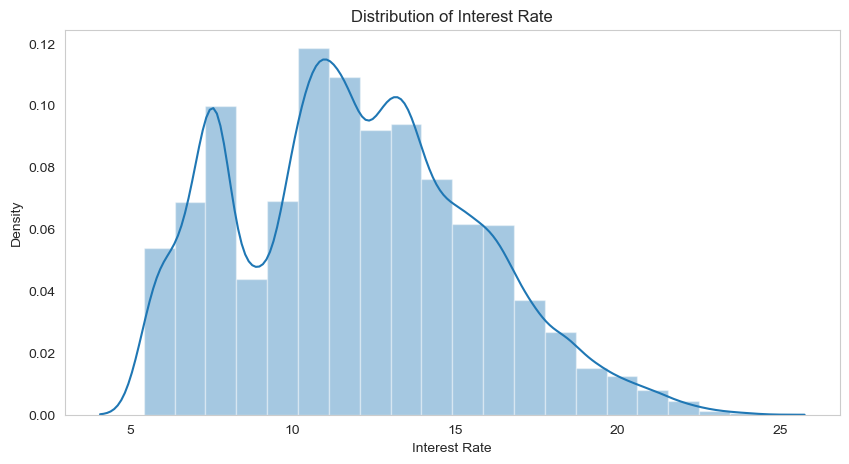

In [184]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

**Inference**: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

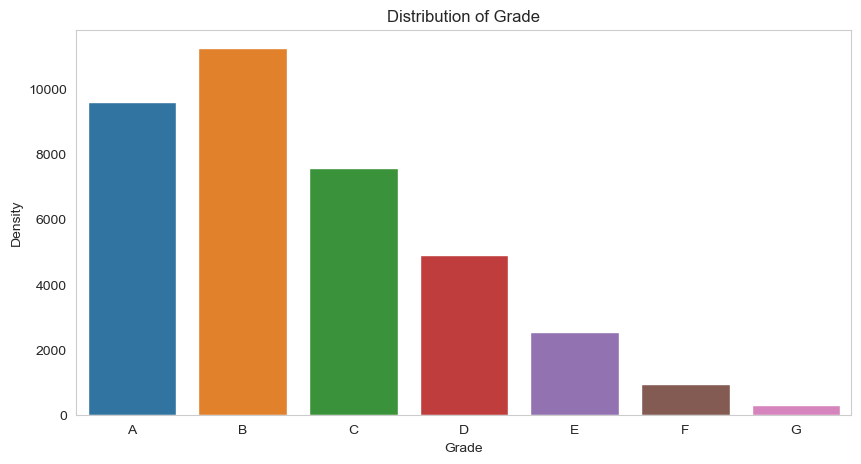

In [185]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

**Inference**: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

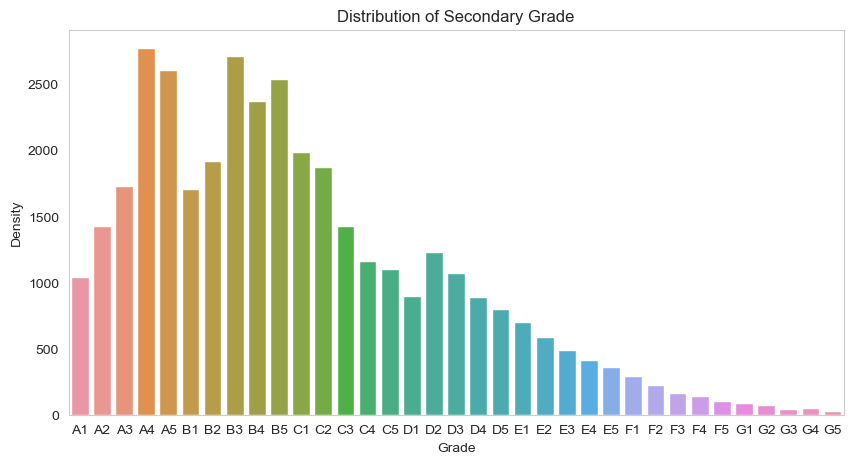

In [186]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

**Inference**: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

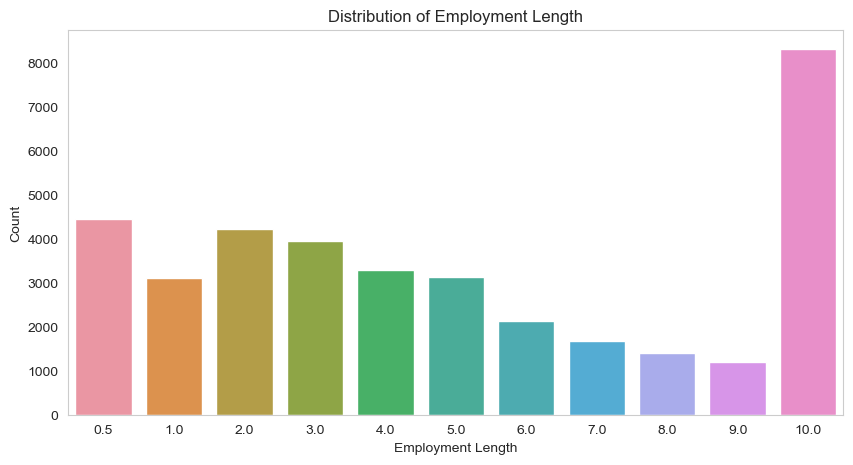

In [187]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(loan_data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers have working experience greater than 10 years.

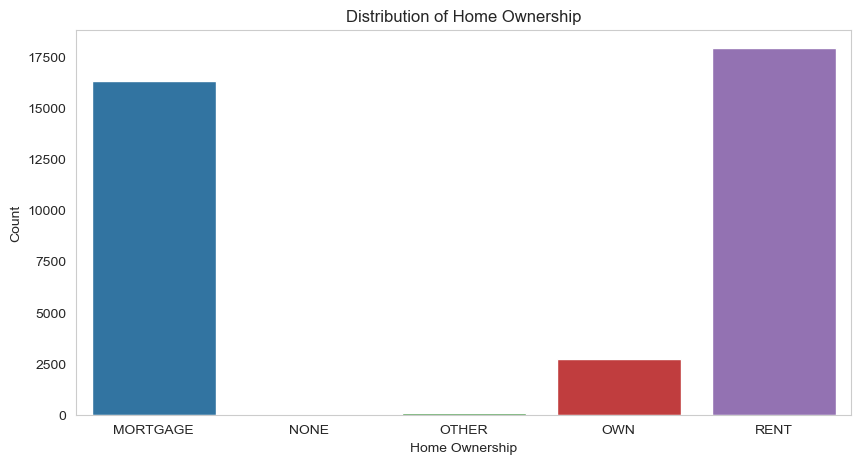

In [188]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loan_data.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers don't posses property and are on mortage or rent.

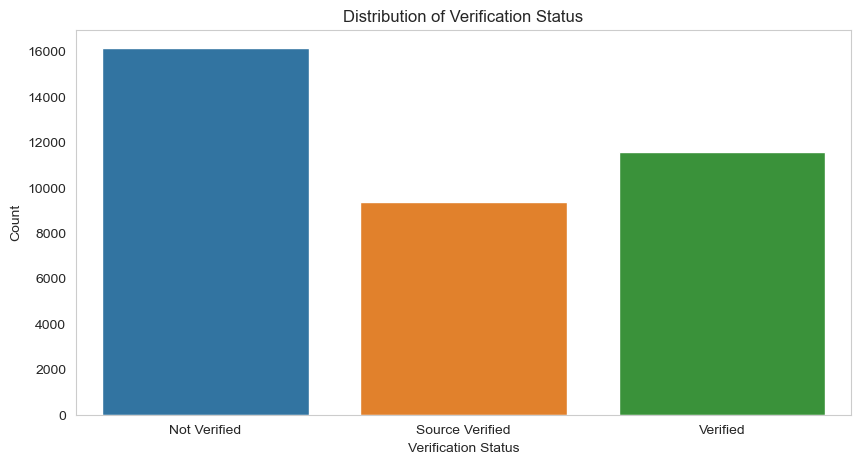

In [189]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loan_data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

**Inference**: About 50% of the borrowers are verified by the company or have source verified.

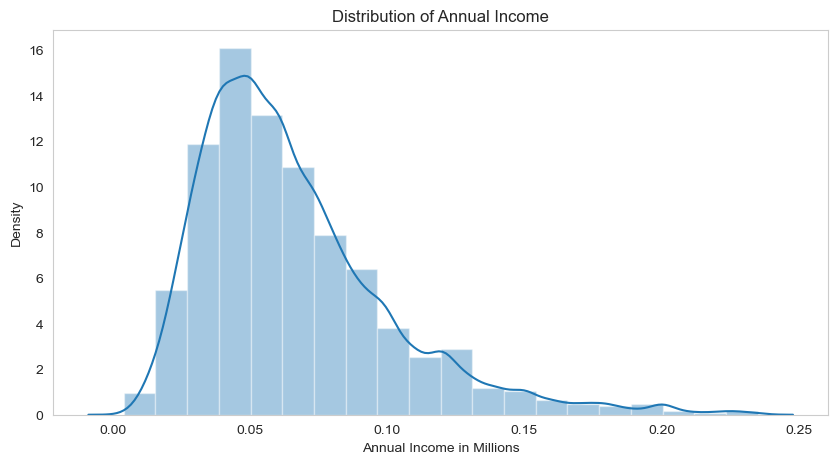

In [190]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

**Inference**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

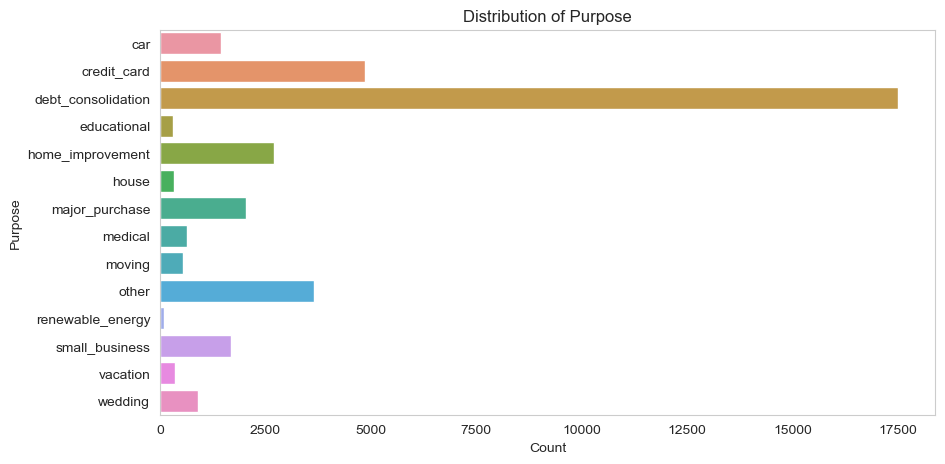

In [191]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

**Inference**: A large percentage of loans are taken for debt consolidation followed by credit card.

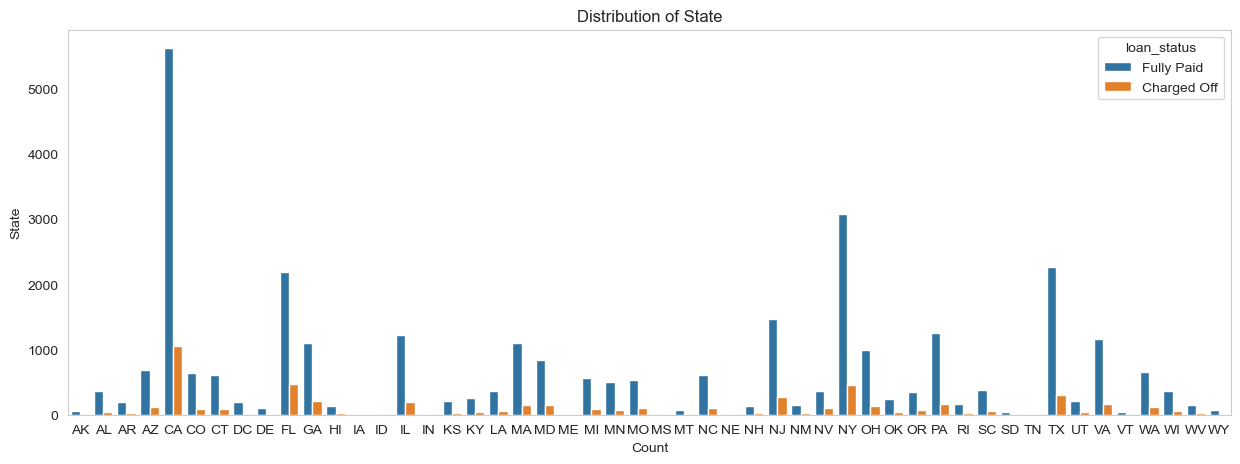

In [192]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(loan_data.addr_state,hue=loan_data.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

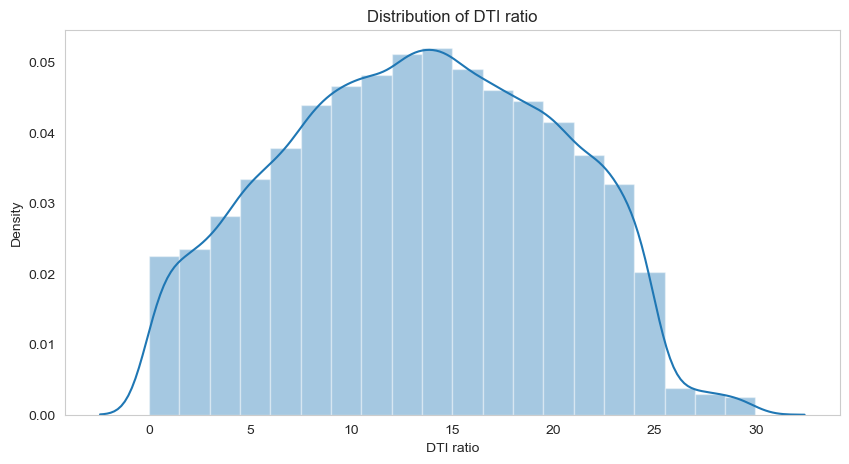

In [56]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

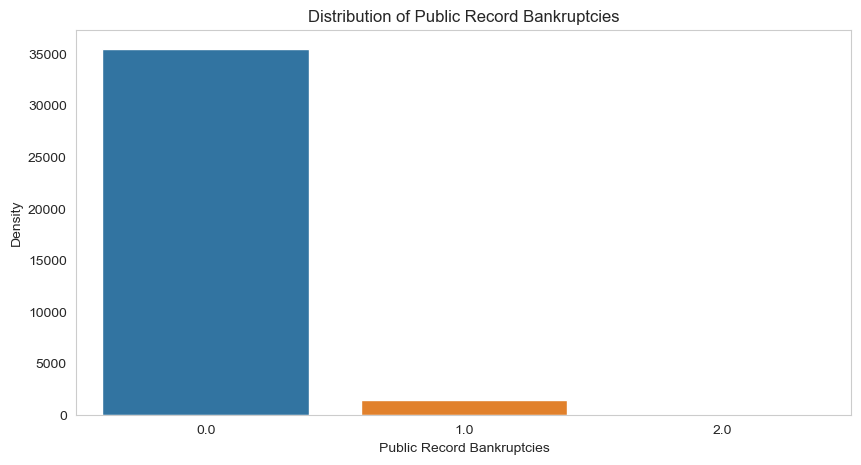

In [193]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have no record of Public Recorded Bankruptcy.

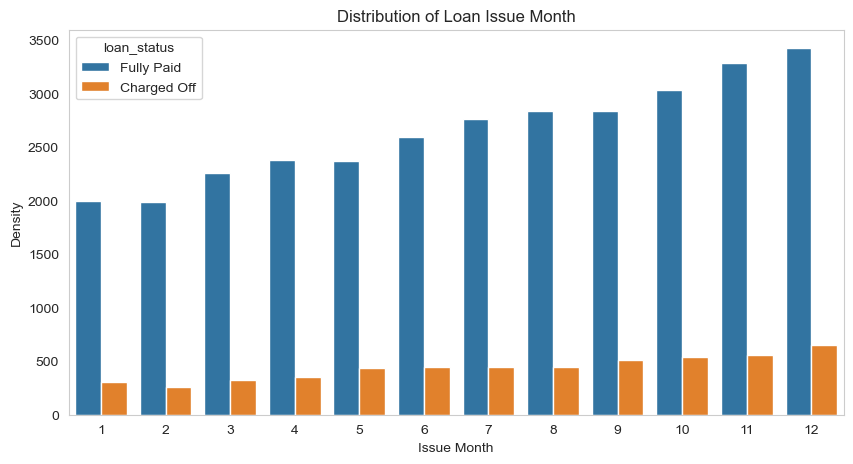

In [194]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_month,hue=loan_data.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

**Inference**: Majority of the loans are given in last quarter of the year.

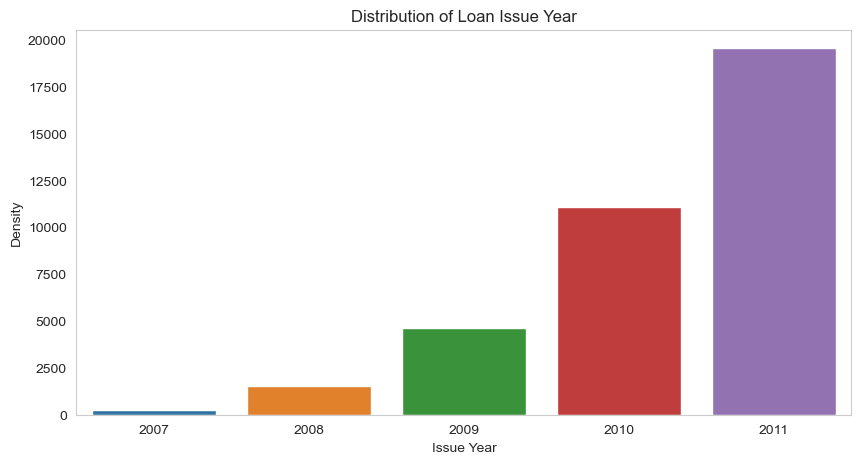

In [195]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

**Inference**: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis

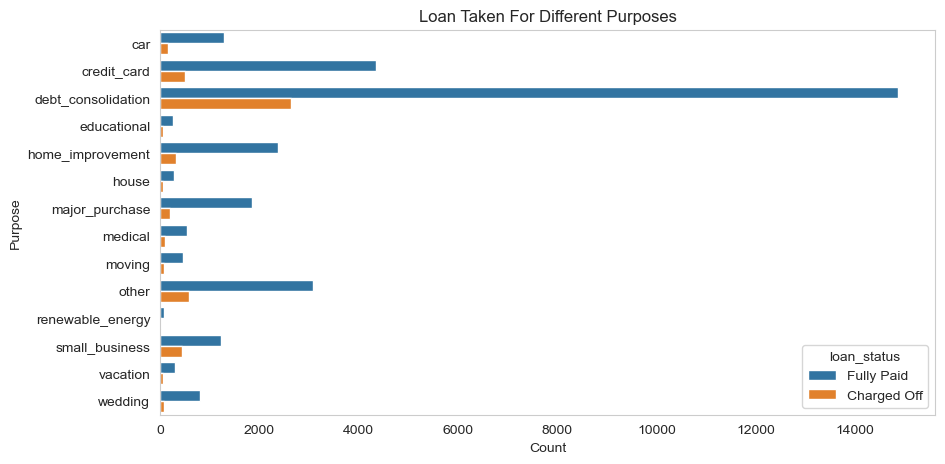

In [196]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

**Inference:** Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

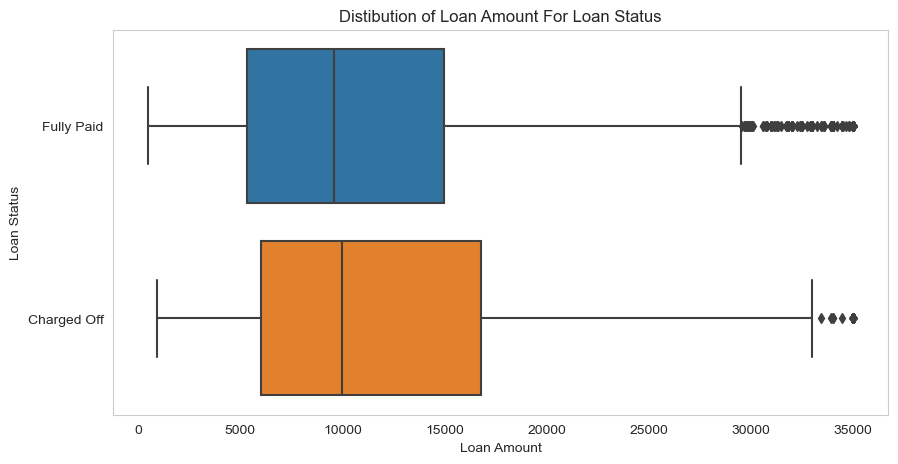

In [198]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

**Inference:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

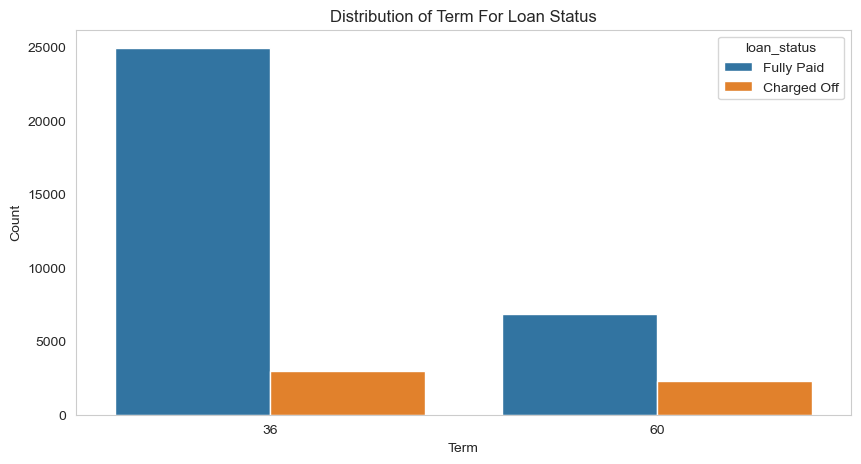

In [199]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

**Inference:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

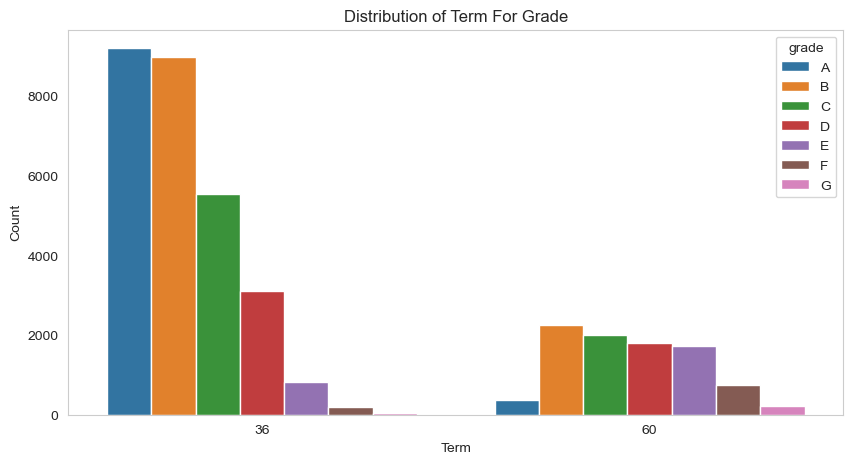

In [200]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

**Inference:** The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

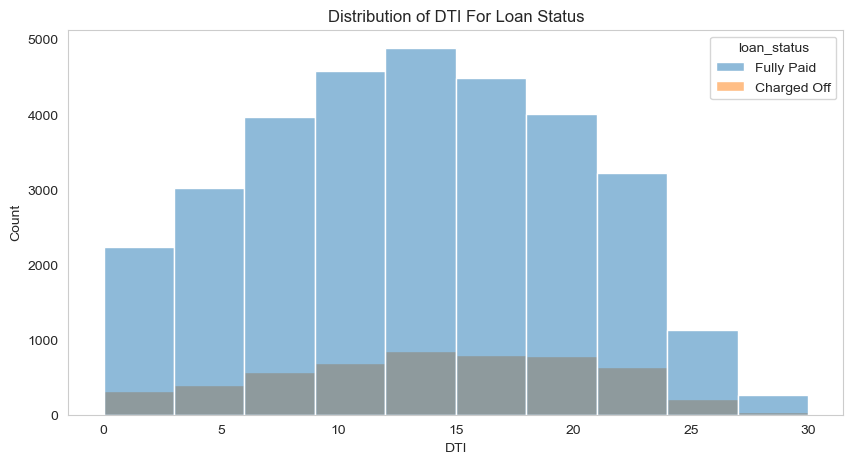

In [201]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

**Inference:** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

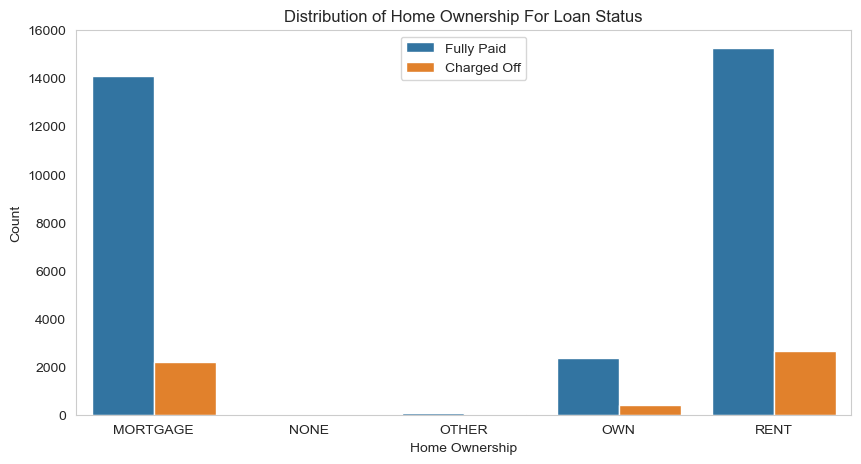

In [202]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

**Inference:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

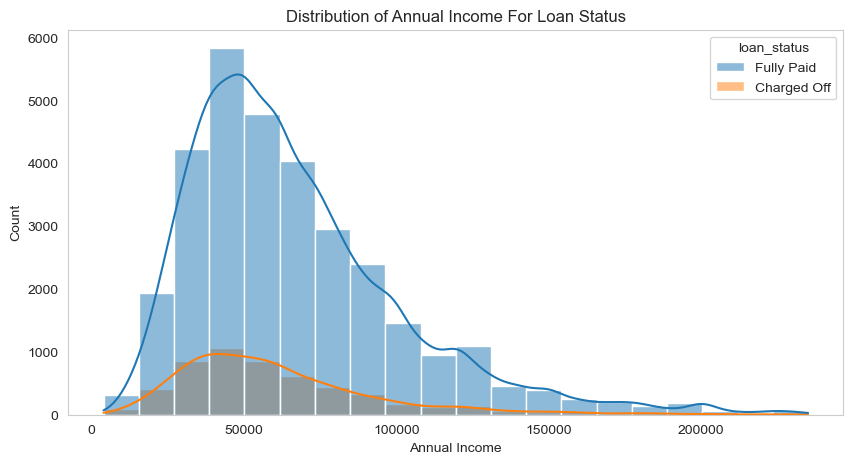

In [203]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

**Inference:** Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

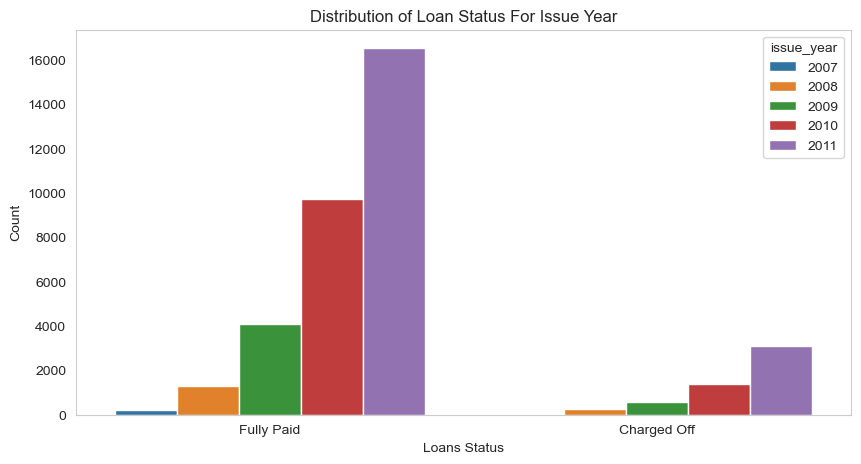

In [67]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

**Inference:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

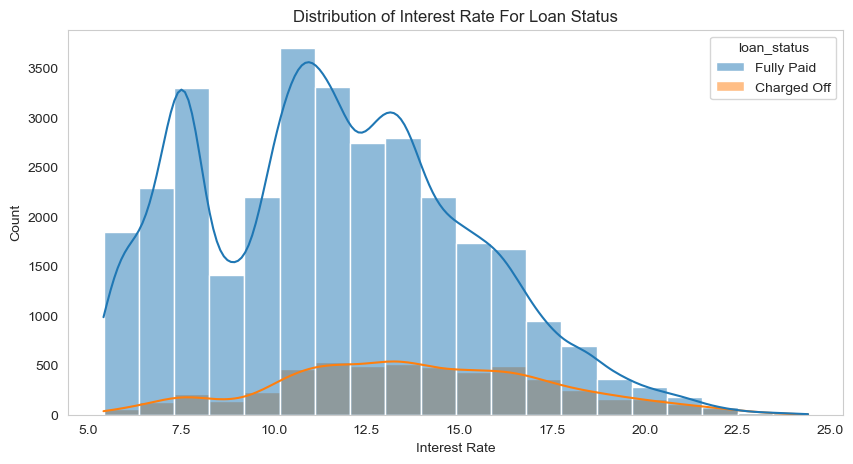

In [204]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

**Inference:** The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

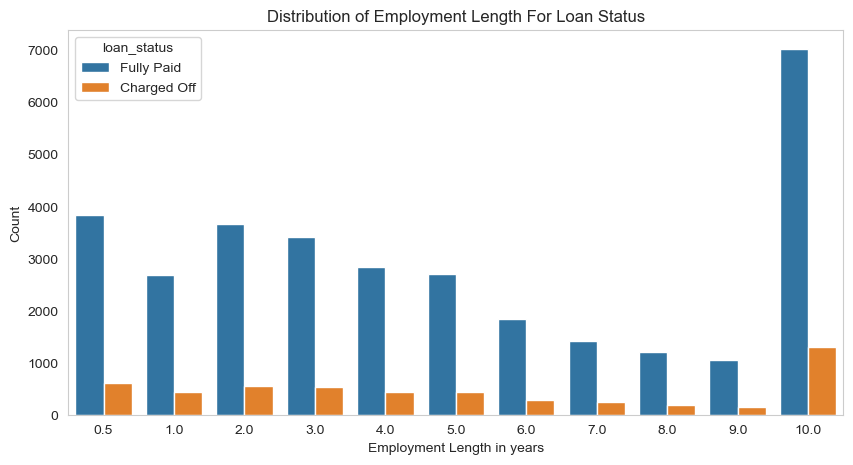

In [205]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

**Inference:** The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis

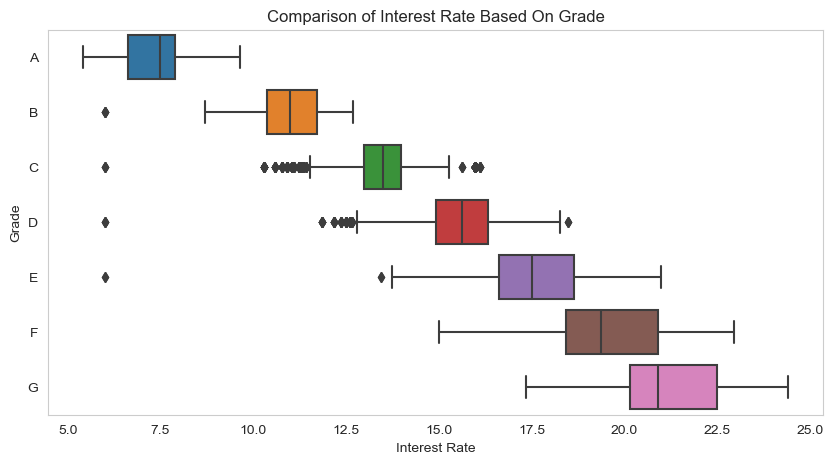

In [206]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

**Inference:** The Grade represent risk factor thus we can say interst rate increases with the risk.

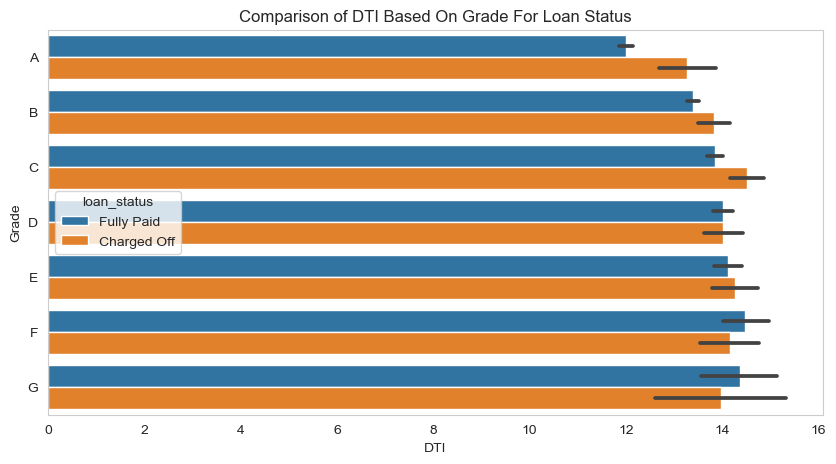

In [207]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

**Inference:** The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

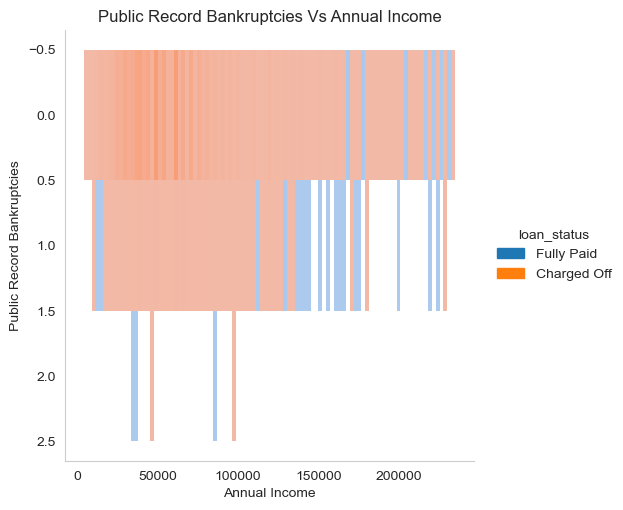

In [72]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

**Inference:** The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

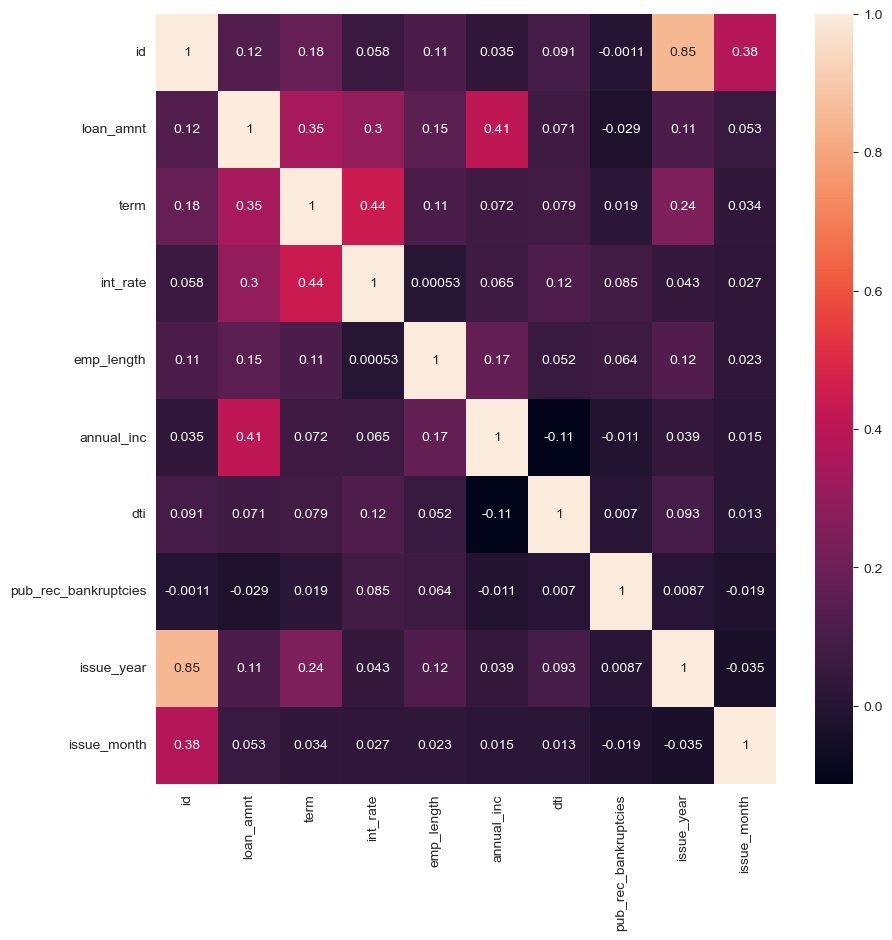

In [208]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

## Summary
### All the above analysis, calculations and Report shows details of  Univariate Analysis, Segmented Univariate Analysis, Bivariate Analysis, Recommendations. It will help in loan sanctions.